<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# prompt: 1. Data Exploration and Preprocessing:
# •	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
# •	Handle missing values as per the best practices (imputation, removal, etc.).
# •	Apply scaling techniques to numerical features:
# •	Standard Scaling
# •	Min-Max Scaling
# •	Discuss the scenarios where each scaling technique is preferred and why.

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
try:
    df = pd.read_csv('adult_with_headers.csv')
except FileNotFoundError:
    print("Error: 'adult_with_headers.csv' not found. Please replace it with the correct file path.")
    # Create a dummy DataFrame for demonstration if the file is not found
    data = {'col1': [1, 2, 3, 4, 5, None],
            'col2': [10, 20, None, 40, 50, 60],
            'col3': ['A', 'B', 'C', 'A', 'B', 'C'],
            'col4': [100, 200, 300, 400, 500, 600]}
    df = pd.DataFrame(data)
    print("Using a dummy DataFrame for demonstration.")


# Basic data exploration
print("--- Basic Data Exploration ---")
print("Head of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

# Handle missing values
# Example: Impute missing numerical values with the mean
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Imputed missing values in '{col}' with the mean ({mean_value:.2f})")

# Example: Remove rows with missing values in categorical columns (if any remain)
# Identify columns that are not numerical and still have missing values after numerical imputation
categorical_cols_with_missing = df.select_dtypes(exclude=['number']).columns[df.select_dtypes(exclude=['number']).isnull().any()]
if not categorical_cols_with_missing.empty:
    initial_rows = len(df)
    df.dropna(subset=categorical_cols_with_missing, inplace=True)
    rows_removed = initial_rows - len(df)
    if rows_removed > 0:
        print(f"\nRemoved {rows_removed} rows with missing values in categorical columns: {list(categorical_cols_with_missing)}")


print("\n--- After Handling Missing Values ---")
print("Missing values per column:")
print(df.isnull().sum())

# Apply scaling techniques to numerical features
# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['number']).columns

if not numerical_cols.empty:
    print("\n--- Applying Scaling Techniques ---")

    # Standard Scaling
    print("\nApplying Standard Scaling...")
    scaler_standard = StandardScaler()
    df_standard_scaled = df.copy()
    df_standard_scaled[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])
    print("Standard Scaled DataFrame Head:")
    print(df_standard_scaled[numerical_cols].head())
    print("Standard Scaled DataFrame Describe:")
    print(df_standard_scaled[numerical_cols].describe())

    # Min-Max Scaling
    print("\nApplying Min-Max Scaling...")
    scaler_minmax = MinMaxScaler()
    df_minmax_scaled = df.copy()
    df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])
    print("Min-Max Scaled DataFrame Head:")
    print(df_minmax_scaled[numerical_cols].head())
    print("Min-Max Scaled DataFrame Describe:")
    print(df_minmax_scaled[numerical_cols].describe())

else:
    print("\nNo numerical columns found for scaling.")

print("\n--- Discussion on Scaling Techniques ---")
print("Standard Scaling:")
print("  - Centers the data around the mean with a unit standard deviation.")
print("  - Formula: z = (x - μ) / σ")
print("  - Scenarios: Preferred when the feature distribution is approximately Gaussian or when the algorithm (e.g., Linear Regression, Logistic Regression, Support Vector Machines with RBF kernel, PCA, K-Means) assumes zero mean and unit variance. It is less affected by outliers compared to Min-Max scaling because it uses the standard deviation in the denominator.")

print("\nMin-Max Scaling:")
print("  - Scales the data to a fixed range, usually between 0 and 1.")
print("  - Formula: z = (x - min) / (max - min)")
print("  - Scenarios: Preferred when the feature range is more important than the distribution shape, or when the algorithm (e.g., Neural Networks) is sensitive to the scale of features but not necessarily their distribution. It is more affected by outliers, as extreme values will influence the max and min used in the scaling.")

--- Basic Data Exploration ---
Head of the dataset:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174 

In [11]:
# prompt: 2. Encoding Techniques:
# •	Apply One-Hot Encoding to categorical variables with less than 5 categories.
# •	Use Label Encoding for categorical variables with more than 5 categories.
# •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

print("\n--- Applying Encoding Techniques ---")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns identified: {list(categorical_cols)}")

# Separate columns for One-Hot and Label Encoding
onehot_cols = [col for col in categorical_cols if df[col].nunique() < 5]
label_cols = [col for col in categorical_cols if df[col].nunique() >= 5]

print(f"\nColumns for One-Hot Encoding (less than 5 categories): {onehot_cols}")
print(f"Columns for Label Encoding (5 or more categories): {label_cols}")


# Apply One-Hot Encoding
if onehot_cols:
    print("\nApplying One-Hot Encoding...")
    # Initialize OneHotEncoder. handle_unknown='ignore' can be useful for unseen categories in test sets.
    # sparse_output=False makes the output a numpy array instead of a sparse matrix.
    onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    # Fit and transform the selected columns
    onehot_encoded_data = onehot_encoder.fit_transform(df[onehot_cols])

    # Create a DataFrame from the one-hot encoded data with appropriate column names
    # Get feature names after fitting
    onehot_feature_names = onehot_encoder.get_feature_names_out(onehot_cols)
    df_onehot_encoded = pd.DataFrame(onehot_encoded_data, columns=onehot_feature_names, index=df.index)

    # Drop the original one-hot encoded columns and concatenate the new ones
    df = df.drop(columns=onehot_cols)
    df = pd.concat([df, df_onehot_encoded], axis=1)

    print("DataFrame head after One-Hot Encoding:")
    print(df.head())
else:
    print("\nNo columns found for One-Hot Encoding based on the category threshold.")


# Apply Label Encoding
if label_cols:
    print("\nApplying Label Encoding...")
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    for col in label_cols:
        # Apply Label Encoding to each selected column
        df[col] = label_encoder.fit_transform(df[col])
        print(f"Applied Label Encoding to '{col}'")

    print("DataFrame head after Label Encoding:")
    print(df.head())
else:
    print("\nNo columns found for Label Encoding based on the category threshold.")


print("\n--- Discussion on Encoding Techniques ---")
print("One-Hot Encoding:")
print("  - Creates a new binary column for each unique category in the original feature.")
print("  - Each row will have a 1 in the column corresponding to its category and 0s elsewhere.")
print("  - Pros:")
print("    - Avoids imposing an artificial ordinal relationship between categories.")
print("    - Suitable for nominal categorical data (categories without a natural order).")
print("    - Many machine learning algorithms (e.g., linear models, SVMs) expect numerical input and work well with one-hot encoded data.")
print("  - Cons:")
print("    - Can lead to a high-dimensional dataset if a categorical variable has many unique categories (curse of dimensionality).")
print("    - Can increase multicollinearity if the categories are not mutually exclusive.")

print("\nLabel Encoding:")
print("  - Assigns a unique integer to each unique category in the original feature.")
print("  - Pros:")
print("    - Simple and space-efficient.")
print("    - Preserves the dimensionality of the dataset.")
print("  - Cons:")
print("    - Imposes an artificial ordinal relationship between categories based on the assigned integers.")
print("    - This can be problematic for algorithms that interpret these integers as having a meaningful order or magnitude (e.g., linear models, tree-based models might sometimes be less affected but can still be influenced).")
print("    - Best suited for ordinal categorical data (categories with a natural order, which is often not the case for nominal features). Using it for nominal data can lead to misleading results.")

print("\nChoosing between One-Hot and Label Encoding depends on:")
print("  - The nature of the categorical variable (nominal vs. ordinal).")
print("  - The machine learning algorithm you are using.")
print("  - The number of unique categories in the feature.")
print("  - Memory and computational constraints.")

print("\nFinal DataFrame head after all preprocessing steps:")
print(df.head())
print("\nFinal DataFrame info:")
df.info()


--- Applying Encoding Techniques ---

Categorical columns identified: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

Columns for One-Hot Encoding (less than 5 categories): ['sex', 'income']
Columns for Label Encoding (5 or more categories): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

Applying One-Hot Encoding...
DataFrame head after One-Hot Encoding:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   


--- Feature Engineering ---

Could not create 'hours_per_week_age_ratio': required columns ('hours-per-week', 'age') not found.
Could not create 'capital_net': required columns ('capital-gain', 'capital-loss') not found.

DataFrame head with new features:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0            

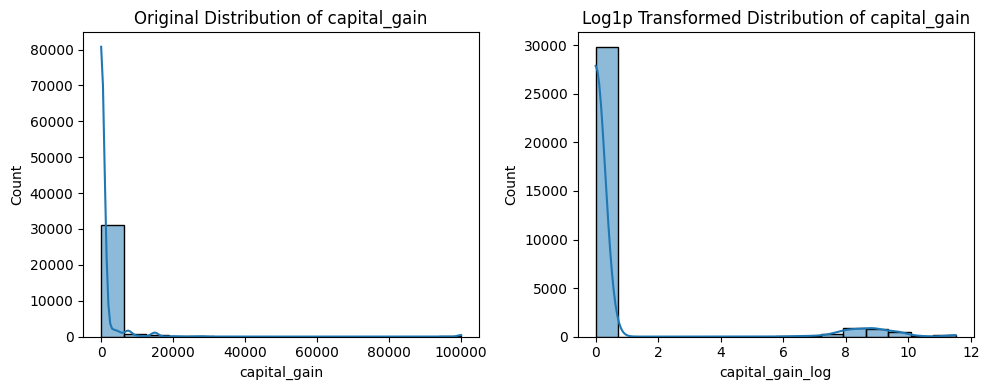


Rationale for Log Transformation:
The feature 'capital_gain' shows significant positive skewness, with a long tail towards higher values.
Many machine learning algorithms (especially linear models) assume that features are normally distributed or at least symmetrically distributed.
Highly skewed features can disproportionately influence these models.
Log transformation (log1p) is a common technique used to reduce the skewness of positively skewed data.
It compresses the range of values and can help make the distribution more symmetric, bringing it closer to a normal distribution.
This can lead to better model performance and interpretability.
We use log1p (log(1+x)) instead of log(x) to handle instances where the feature value is 0.

DataFrame head after potential transformation:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               

In [12]:
# prompt: 3. Feature Engineering:
# •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
# •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Feature Engineering

print("\n--- Feature Engineering ---")

# Create new features

# Feature 1: 'hours_per_week_age_ratio'
# Rationale: This feature might capture how an individual's work intensity (hours per week) relates to their age.
# Older individuals might work fewer hours, or conversely, older individuals still working long hours might be distinct.
# This could be a non-linear interaction effect that linear models don't capture well on their own.
if 'hours-per-week' in df.columns and 'age' in df.columns:
    df['hours_per_week_age_ratio'] = df['hours-per-week'] / (df['age'] + 1e-6) # Add small constant to avoid division by zero
    print("\nCreated feature: 'hours_per_week_age_ratio'")
else:
    print("\nCould not create 'hours_per_week_age_ratio': required columns ('hours-per-week', 'age') not found.")

# Feature 2: 'income_per_year' (assuming 'capital-gain' and 'capital-loss' represent annual values)
# Rationale: This attempts to aggregate different forms of capital income into a single feature.
# The net capital gain/loss combined with other income features could provide a more complete picture of an individual's financial situation.
# Note: This is a simplification and assumes these are annual figures.
if 'capital-gain' in df.columns and 'capital-loss' in df.columns:
    df['capital_net'] = df['capital-gain'] - df['capital-loss']
    print("Created feature: 'capital_net'")
else:
     print("Could not create 'capital_net': required columns ('capital-gain', 'capital-loss') not found.")

print("\nDataFrame head with new features:")
print(df.head())


# Apply transformation to a skewed numerical feature

# Identify numerical columns (after potential new feature creation)
numerical_cols_after_fe = df.select_dtypes(include=np.number).columns

# Check for skewness
print("\nChecking skewness of numerical features:")
skewness = df[numerical_cols_after_fe].skew().sort_values(ascending=False)
print(skewness)

# Select a highly skewed feature for transformation (e.g., 'capital-gain' or 'capital_net' are often skewed)
# Let's choose 'capital-gain' if it exists and is skewed. If not, pick the most skewed one among the candidates.
feature_to_transform = None
if 'capital-gain' in skewness.index and abs(skewness['capital-gain']) > 1: # Threshold for high skewness
    feature_to_transform = 'capital-gain'
elif 'capital_net' in skewness.index and abs(skewness['capital_net']) > 1:
     feature_to_transform = 'capital_net'
else:
    # Find the most skewed numerical column
    most_skewed_col = skewness.index[0] if not skewness.empty else None
    if most_skewed_col is not None and abs(skewness[most_skewed_col]) > 1:
         feature_to_transform = most_skewed_col
    else:
        print("\nNo highly skewed numerical features found for transformation.")

if feature_to_transform:
    print(f"\nSelected '{feature_to_transform}' for transformation based on skewness ({skewness[feature_to_transform]:.2f}).")

    # Visualize the original distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature_to_transform], kde=True)
    plt.title(f'Original Distribution of {feature_to_transform}')

    # Apply log transformation (add 1 to handle zeros)
    # Log transformation is suitable for positively skewed data.
    # log1p (log(1+x)) is often used to handle features that contain zero values.
    df[f'{feature_to_transform}_log'] = np.log1p(df[feature_to_transform])
    print(f"Applied log1p transformation to '{feature_to_transform}', created '{feature_to_transform}_log'")

    # Visualize the transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'{feature_to_transform}_log'], kde=True)
    plt.title(f'Log1p Transformed Distribution of {feature_to_transform}')
    plt.tight_layout()
    plt.show()

    print("\nRationale for Log Transformation:")
    print(f"The feature '{feature_to_transform}' shows significant positive skewness, with a long tail towards higher values.")
    print("Many machine learning algorithms (especially linear models) assume that features are normally distributed or at least symmetrically distributed.")
    print("Highly skewed features can disproportionately influence these models.")
    print("Log transformation (log1p) is a common technique used to reduce the skewness of positively skewed data.")
    print("It compresses the range of values and can help make the distribution more symmetric, bringing it closer to a normal distribution.")
    print("This can lead to better model performance and interpretability.")
    print("We use log1p (log(1+x)) instead of log(x) to handle instances where the feature value is 0.")

print("\nDataFrame head after potential transformation:")
print(df.head())
print("\nFinal DataFrame info after Feature Engineering:")
df.info()

In [2]:
!pip uninstall pandas numpy scikit-learn ppscore -y
!pip install pandas==1.5.3 numpy==1.23.5 scikit-learn==1.2.2
!pip install -q ppscore

# After running these commands, you might need to restart your kernel
# to ensure the newly installed packages are loaded correctly.
# Then, you can rerun your notebook cells from the beginning.

# Re-import necessary libraries
from sklearn.ensemble import IsolationForest
import ppscore as pps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("\n--- Feature Selection ---")

# Use Isolation Forest to identify outliers
print("\nUsing Isolation Forest to identify outliers...")
# Initialize Isolation Forest. contamination can be an estimated proportion of outliers.
# auto: decides the threshold based on the training data.
# float: specifies the proportion of outliers in the data set.
# An alternative is to set a fixed threshold on the anomaly scores.
# Let's use 'auto' for simplicity initially.
iso_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model and predict outliers. -1 for outliers, 1 for inliers.
# It's often recommended to fit Isolation Forest only on numerical features.
# Ensure we use the numerical columns after all preprocessing steps.
# Make sure df is loaded or available from previous cells.
# If running this cell independently after restarting the kernel, you might need to load df again.
# Example of reloading (adjust path as needed):
# try:
#     df = pd.read_csv('adult_with_headers.csv')
#     # Re-run necessary preprocessing/feature engineering steps here if starting from scratch
# except FileNotFoundError:
#     print("Error: 'adult_with_headers.csv' not found. Please replace it with the correct file path.")
#     # Create a dummy DataFrame for demonstration if the file is not found
#     data = {'col1': [1, 2, 3, 4, 5, None],
#             'col2': [10, 20, None, 40, 50, 60],
#             'col3': ['A', 'B', 'C', 'A', 'B', 'C'],
#             'col4': [100, 200, 300, 400, 500, 600]}
#     df = pd.DataFrame(data)
#     print("Using a dummy DataFrame for demonstration.")
#     # Manually apply preprocessing steps here if needed to match the state before the error
#     # This is highly dependent on your previous steps.

# The dataframe 'df' is expected to be available from the previous notebook cells.
# If running this cell in isolation, you would need to load and preprocess the data first.

numerical_cols_for_outliers = df.select_dtypes(include=np.number).columns.tolist()

# Handle potential issue if the target variable is numerical and included here.
# Assume 'income_>=50K' or similar might be the target if using adult dataset.
# If you know your target column, exclude it. Example:
target_col = 'income_>50K' # Replace with your actual target column name if numerical
# Check if the potential target column exists and is numerical before attempting to remove it
if target_col in numerical_cols_for_outliers:
    numerical_cols_for_outliers.remove(target_col)
    print(f"Removed target column '{target_col}' from outlier detection features.")

if not numerical_cols_for_outliers:
    print("No numerical features available for Isolation Forest after removing target/identifying numerical columns.")
    df_no_outliers = df.copy() # Proceed with original DataFrame if no numerical features
else:
    # Isolation Forest expects numpy array or similar, convert from DataFrame subset
    X_numerical = df[numerical_cols_for_outliers].values

    try:
        outlier_predictions = iso_forest.fit_predict(X_numerical)

        # Filter the DataFrame to keep only inliers (where prediction is 1)
        df_no_outliers = df.iloc[outlier_predictions == 1].copy() # Use iloc to preserve original index alignment

        num_outliers_detected = (outlier_predictions == -1).sum()
        original_rows = len(df)
        remaining_rows = len(df_no_outliers)

        print(f"Original number of rows: {original_rows}")
        print(f"Number of outliers detected and removed: {num_outliers_detected}")
        print(f"Number of rows remaining after outlier removal: {remaining_rows}")
        print(f"Percentage of rows removed: {(num_outliers_detected / original_rows) * 100:.2f}%")

        print("\nDataFrame head after outlier removal:")
        print(df_no_outliers.head())
    except Exception as e:
        print(f"An error occurred during Isolation Forest outlier detection: {e}")
        print("Proceeding without removing outliers.")
        df_no_outliers = df.copy() # Revert to original DataFrame

print("\nDiscussion on how outliers can affect model performance:")
print("- Outliers are data points that are significantly different from other observations.")
print("- They can disproportionately influence the parameters of many machine learning algorithms, especially those based on distance metrics or assuming normality (e.g., Linear Regression, K-Means, PCA).")
print("- This influence can lead to skewed model estimates, wider confidence intervals, and ultimately, a model that performs poorly on new, unseen data.")
print("- Outliers can also affect scaling techniques (like Min-Max scaling) and correlation calculations.")
print("- Tree-based models (like Decision Trees, Random Forests, Gradient Boosting) are generally more robust to outliers because their splitting criteria are based on relative order of values rather than absolute magnitudes, although extreme outliers can still influence splits, especially early on.")
print("- Isolation Forest works by isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Recursive partitioning results in shorter paths for outliers, which are fewer and farther apart, than for inliers.")


# Apply PPS (Predictive Power Score)
print("\nApplying PPS (Predictive Power Score)...")
# PPS works best on the DataFrame *after* outlier removal, if outliers were removed.
# If outlier removal failed or wasn't performed, use the latest df.
df_for_pps = df_no_outliers.copy()

# PPS can take some time on large datasets, especially with many columns.
# Calculate PPS matrix
try:
    # pps.matrix() calculates the PPS for all column pairs
    pps_matrix = pps.matrix(df_for_pps)
    print("\nPPS Matrix (subset):")
    # Print a smaller subset or visualize the matrix for better readability
    print(pps_matrix[['x', 'y', 'ppscore', 'kind']].head()) # Show a few rows

    # Convert PPS matrix to a more convenient pivot table format
    # pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')
    # print("\nPPS Pivot Table (subset):")
    # print(pps_pivot.head()) # Show head of pivot

    # Visualize the PPS matrix as a heatmap
    # It's often better to visualize only the PPS between features and the target variable
    # Let's assume the target is one of the columns.
    # If your target is categorical and label encoded, PPS can still work.
    # If your target was one-hot encoded into multiple columns, you might calculate PPS for each.
    # Let's find the target column assuming it's the one not used for OneHotEncoding or LabelEncoding above
    # A common target in the adult dataset is related to income, e.g., '>50K' vs '<=50K'

    # Attempt to identify a potential target column based on previous steps
    # This is a heuristic and might need manual adjustment based on your dataset
    all_cols = set(df.columns)
    # Note: Reading the CSV again here assumes the original file is still accessible.
    # In a real scenario, you might have stored the original column names differently
    # or know the target column explicitly.
    try:
        original_cols = set(pd.read_csv('adult_with_headers.csv').columns)
    except FileNotFoundError:
        print("Warning: Could not read original CSV to identify potential target column based on original columns.")
        original_cols = set(df.columns) # Fallback to current columns

    # Target column is likely one that was either LabelEncoded or is the original categorical target
    # If the target was one-hot encoded, PPS will show relationships with each resulting binary column.

    # Let's assume the target is 'income_>50K' or similar based on common adult datasets.
    # If your target is different, replace 'income_>50K' below.
    # Also consider if the target was label encoded, its name might remain the same.
    # Check both original column names and encoded names.
    # It's safer to explicitly define your target column name if known.
    # For example, if the target is the original 'income' column which was LabelEncoded:
    # target_col_actual = 'income'
    # Or if it was One-Hot encoded:
    # target_col_actual = 'income_>50K' # Assuming this is one of the resulting columns

    # Based on the prompt (Feature Selection is before model training), the target might not be explicitly defined yet.
    # However, PPS is often used relative to the target.
    # Let's refine the potential target columns search to look for common patterns or the last column (common for targets).
    potential_target_cols = [col for col in df_for_pps.columns if 'income_' in col or 'target' in col or 'salary' in col]
    # Add the last column as a potential target if it's not already in the list
    if df_for_pps.columns.tolist() and df_for_pps.columns[-1] not in potential_target_cols:
         potential_target_cols.append(df_for_pps.columns[-1])

    # Filter for columns that actually exist in the DataFrame
    potential_target_cols = [col for col in potential_target_cols if col in df_for_pps.columns]

    if potential_target_cols:
        target_pps_matrix = pps_matrix[pps_matrix['y'].isin(potential_target_cols)]
        print(f"\nPPS scores predicting potential target column(s): {potential_target_cols}")

        # Pivot for heatmap visualization
        if not target_pps_matrix.empty:
            # Ensure 'x' and 'y' columns exist and are used correctly for pivoting
            if 'x' in target_pps_matrix.columns and 'y' in target_pps_matrix.columns:
                # Drop rows with NaN in 'ppscore' or relevant columns before pivoting if necessary
                 target_pps_matrix = target_pps_matrix.dropna(subset=['x', 'y', 'ppscore'])
                 if not target_pps_matrix.empty:
                    # Handle potential duplicate entries if pivot fails
                    target_pps_pivot = target_pps_matrix.pivot_table(index='x', columns='y', values='ppscore', aggfunc='first')


                    plt.figure(figsize=(8, max(6, len(target_pps_pivot.index) * 0.3))) # Adjust figure size based on number of features
                    sns.heatmap(target_pps_pivot, annot=True, cmap='Blues', fmt=".2f")
                    plt.title('PPS Predicting Potential Target Column(s)')
                    plt.show()
                 else:
                    print("No valid data remaining for PPS heatmap after dropping NaNs.")
            else:
                 print("PPS matrix does not contain 'x' or 'y' columns required for pivoting.")
        else:
            print("No PPS relationships found for the identified potential target columns.")

        # Also visualize PPS predicting *other* features
        # This shows if other features can predict each other, which can indicate multicollinearity
        # Filter out rows where x predicts y, but not where y predicts x if you want unique pairs
        # Or just show the full matrix heatmap (can be large)
        # For simplicity, let's show PPS where ppscore is significant (>0.2, for example)
        significant_pps = pps_matrix[(pps_matrix['ppscore'] > 0.2) & (pps_matrix['x'] != pps_matrix['y'])].sort_values(by='ppscore', ascending=False)
        print("\nSignificant PPS relationships (ppscore > 0.2, excluding self-prediction):")
        print(significant_pps[['x', 'y', 'ppscore', 'kind']].head(15)) # Show top 15 significant relationships

    else:
         print("\nCould not identify any relevant potential target columns in the DataFrame for PPS visualization.")


except Exception as e:
    print(f"An error occurred while calculating or visualizing PPS: {e}")
    print("Please ensure 'ppscore' library is installed and your DataFrame is suitable.")
    pps_matrix = None # Ensure pps_matrix is None if calculation failed

# Compare PPS findings with the correlation matrix
print("\nComparing PPS findings with the correlation matrix:")

# Calculate the correlation matrix using the DataFrame after outlier removal
# Correlation works only for numerical features.
df_numerical_for_corr = df_for_pps.select_dtypes(include=np.number)

if not df_numerical_for_corr.empty:
    correlation_matrix = df_numerical_for_corr.corr()

    print("\nCorrelation Matrix (absolute values):")
    # Visualize the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix.abs(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Absolute Correlation Matrix of Numerical Features (After Outlier Removal)')
    plt.show()

    print("\nDiscussion comparing PPS and Correlation:")
    print("- **Correlation** measures the linear relationship between two numerical variables. It ranges from -1 (perfect negative linear correlation) to +1 (perfect positive linear correlation). A value near 0 indicates a weak linear relationship.")
    print("- **PPS** measures the predictive power of one column (predictor, x) predicting another column (target, y). It ranges from 0 (x has no predictive power for y) to 1 (x perfectly predicts y).")
    print("- **Key Differences:**")
    print("  - Correlation is **symmetric** (Corr(x, y) = Corr(y, x)), while PPS is **asymmetric** (PPS(x, y) != PPS(y, x) generally). PPS(x, y) tells you how well x predicts y, and PPS(y, x) tells you how well y predicts x. These can be very different.")
    print("  - Correlation only captures **linear** relationships between **numerical** variables.")
    print("  - PPS can capture **linear and non-linear** relationships and works with **numerical and categorical** variables.")
    print("  - PPS indicates the **strength of prediction**, which is often more relevant for feature selection than just linear correlation.")
    print("- **Insights from Comparison:**")
    print("  - A high correlation might imply a high PPS in both directions, but not always, especially if the relationship isn't purely linear.")
    print("  - PPS can reveal strong predictive relationships between features that have low or zero linear correlation (e.g., non-linear dependencies).")
    print("  - PPS is particularly useful for assessing the predictive power of features relative to the **target variable**, even if the target is categorical (if it's been encoded appropriately, or by using PPS functions that handle categorical targets).")
    print("  - Comparing Corr(x, y) and PPS(x, y) can highlight non-linear dependencies or the impact of outliers (though outliers were addressed before calculating here).")
    print("  - High PPS between two predictor features (x and y) indicates multicollinearity or redundancy in predictive power. This can help in deciding which features to keep or whether to use techniques like PCA or remove one of the features.")

    if pps_matrix is not None:
        print("\nExample comparison (pick a few pairs):")
        # Select a few pairs from the correlation matrix and compare with PPS
        # Need to map back from potentially encoded columns if necessary.
        # Let's look at pairs with high absolute correlation and compare their PPS.
        high_corr_pairs = correlation_matrix.abs().stack().sort_values(ascending=False)
        # Filter out self-correlation (corr=1) and duplicate pairs (corr(x,y) == corr(y,x))
        # Check for empty Series before attempting to filter
        if not high_corr_pairs.empty:
            high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]
            high_corr_pairs = high_corr_pairs[~high_corr_pairs.index.duplicated(keep='first')] # Keep only one direction (e.g., (A,B) but not (B,A))

            print("\nTop 5 pairs by Absolute Correlation and their PPS:")
            for (col1, col2), corr_value in high_corr_pairs.head(5).items():
                print(f"Pair: ({col1}, {col2})")
                print(f"  Absolute Correlation: {corr_value:.2f}")
                # Find PPS for both directions
                # Safely access PPS score
                pps_x_y_row = pps_matrix[(pps_matrix['x'] == col1) & (pps_matrix['y'] == col2)]
                pps_x_y = pps_x_y_row['ppscore'].iloc[0] if not pps_x_y_row.empty else 'N/A'

                pps_y_x_row = pps_matrix[(pps_matrix['x'] == col2) & (pps_matrix['y'] == col1)]
                pps_y_x = pps_y_x_row['ppscore'].iloc[0] if not pps_y_x_row.empty else 'N/A'

                print(f"  PPS({col1} -> {col2}): {pps_x_y}")
                print(f"  PPS({col2} -> {col1}): {pps_y_x}")
        else:
            print("No high correlation pairs found in the numerical data.")


else:
    print("\nNo numerical columns available for correlation analysis.")


print("\n--- End of Feature Selection ---")

Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: ppscore 1.3.0
Uninstalling ppscore-1.3.0:
  Successfully uninstalled ppscore-1.3.0
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
!pip install --upgrade --force-reinstall numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found